## data load

In [9]:
import pandas as pd
code_df = pd.read_csv('./source/corplist.csv', dtype={'code':'object'})
code_df.head()

,name,code
0,BYC,001460
1,CJ CGV,079160
2,DB손해보험,005830
3,DGB금융지주,139130
4,DSR제강,069730


## data crawling

In [11]:
def getStock(code):
    stock_df = pd.DataFrame()
    for idx in range(10):
        unit_df = pd.read_html('http://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'.format(code, str(idx+1)), header=0)[0]
        unit_df = unit_df.rename(columns={'날짜': 'day', '종가': 'closingPrice', '전일비': 'variation', '시가': 'openingPrice'
                                     , '고가': 'highestPrice', '저가': 'lowestPrice', '거래량': 'volume'})
        unit_df['code'] = code
        stock_df = pd.concat([stock_df,unit_df.dropna()])
    stock_df = stock_df.reset_index()
    
    return stock_df

stock_df = getStock('035420')
print(stock_df.head())
print(stock_df.count())

   index         day  closingPrice  variation  openingPrice  highestPrice  \
0      1  2018.06.05      674000.0     1000.0      678000.0      680000.0   
1      2  2018.06.04      673000.0     7000.0      681000.0      687000.0   
2      3  2018.06.01      680000.0    11000.0      674000.0      686000.0   
3      4  2018.05.31      669000.0    17000.0      660000.0      671000.0   
4      5  2018.05.30      652000.0    16000.0      667000.0      670000.0   

   lowestPrice    volume    code  
0     664000.0   67130.0  035420  
1     671000.0   81871.0  035420  
2     672000.0   91461.0  035420  
3     654000.0  210193.0  035420  
4     648000.0  133965.0  035420  
index           100
day             100
closingPrice    100
variation       100
openingPrice    100
highestPrice    100
lowestPrice     100
volume          100
code            100
dtype: int64


## data trans

In [75]:
stock_df = stock_df.sort_values(by=['day'])
date = stock_df['day'].tolist()
dataset = stock_df.loc[:,['openingPrice', 'closingPrice',  'highestPrice', 'lowestPrice']]
dataset = dataset.T.as_matrix()

/home/raonbit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## create graph

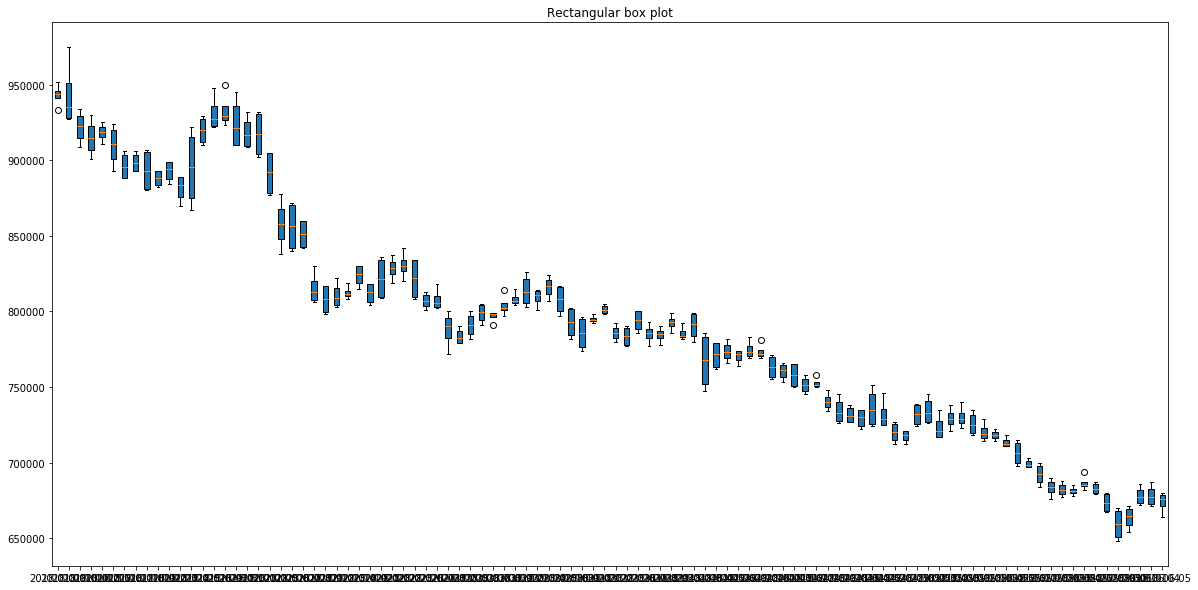

In [80]:
import matplotlib.pyplot as plt

labels = date


plt.figure(figsize=(20,10))
# rectangular box plot
plt.boxplot(dataset,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
plt.title('Rectangular box plot')
plt.show()

## using other package

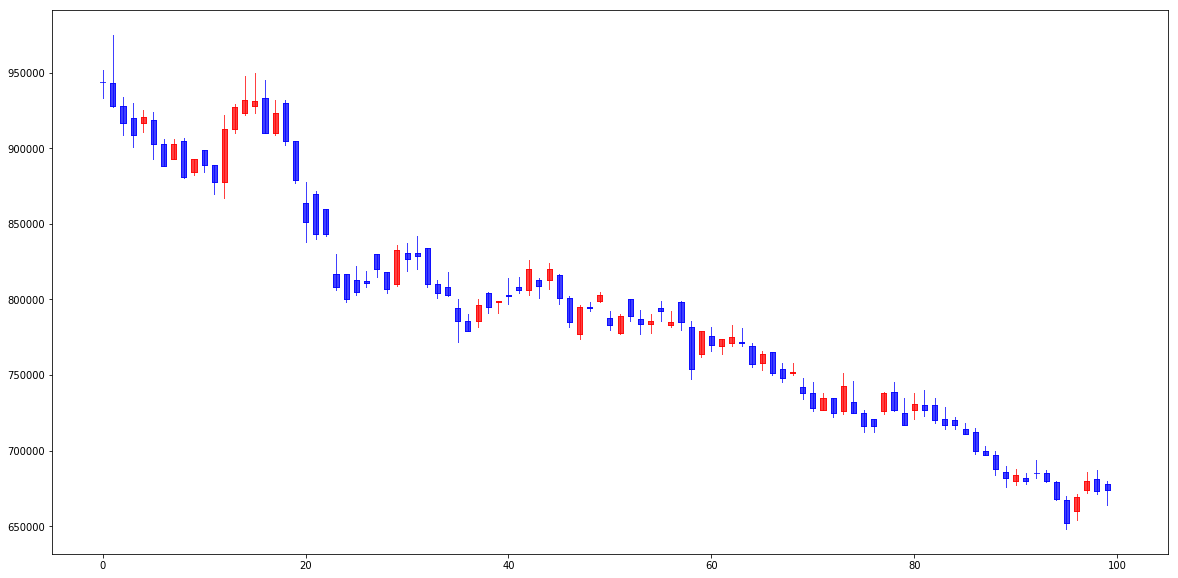

In [79]:
import matplotlib.pyplot as plt
# import matplotlib.finance as matfin
import mpl_finance as matfin # pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

matfin.candlestick2_ohlc(ax, stock_df['openingPrice'], stock_df['highestPrice'], stock_df['lowestPrice'],
                         stock_df['closingPrice'], width=0.5, colorup='r', colordown='b')
plt.show()